In [1]:
from tabulate import tabulate
import networkx as nx
import numpy as np
import matplotlib as plt

In [2]:
from collections import defaultdict 
def GetEulerPath(X):

    edges=[]
    class Graph: 
        def __init__(self,vertices):
            self.V= vertices #No. of vertices 
            self.graph = defaultdict(list)  
            self.Time = 0 
        def addEdge(self,u,v): 
            self.graph[u].append(v) 
            self.graph[v].append(u) 

        def rmvEdge(self, u, v): 
            for index, key in enumerate(self.graph[u]): 
                if key == v: 
                    self.graph[u].pop(index) 
            for index, key in enumerate(self.graph[v]): 
                if key == u: 
                    self.graph[v].pop(index) 

        def DFSCount(self, v, visited): 
            count = 1
            visited[v] = True
            for i in self.graph[v]: 
                if visited[i] == False: 
                    count = count + self.DFSCount(i, visited)		 
            return count 
 
        def isValidNextEdge(self, u, v): 

            if len(self.graph[u]) == 1: 
                return True
            else: 
	
                visited =[False]*(self.V) 
                count1 = self.DFSCount(u, visited) 
    
                self.rmvEdge(u, v) 
                visited =[False]*(self.V) 
                count2 = self.DFSCount(u, visited) 

                self.addEdge(u,v) 

                return False if count1 > count2 else True

        def printEulerUtil(self, u): 
            for v in self.graph[u]: 
                if self.isValidNextEdge(u, v): 
                    edges.append((u,v))
                    self.rmvEdge(u, v) 
                    self.printEulerUtil(v) 



        '''The main function that print Eulerian Trail. It first finds an odd 
        degree vertex (if there is any) and then calls printEulerUtil() 
        to print the path '''
        def printEulerTour(self): 
            #Find a vertex with odd degree 
            u = 0
            for i in range(self.V): 
                if len(self.graph[i]) %2 != 0 : 
                    u = i 
                    break
            print ("\n") 
            self.printEulerUtil(u) 


    g1 = Graph(len(X[0]))
    l=[]
    for i in range(len(X)):
        for j in range(len(X[i])):
            if(X[i][j]==1 and (j,i) not in l):
#             if(X[i][j]==1):
                l.append((i,j))
    for item in l:
        g1.addEdge(item[0],item[1]) 
    g1.printEulerTour() 

    if(len(edges)==len(l)):
        print("Euler path: ", edges)
    else:
        print("No Euler path")


In [3]:
def ChromaticNumber(X):
 
    class Graph():
 
        def __init__(self, vertices):
            self.V = vertices
            self.graph = [[0 for column in range(vertices)]\
                                  for row in range(vertices)]

        def isSafe(self, v, colour, c):
            for i in range(self.V):
                if self.graph[v][i] == 1 and colour[i] == c:
                    return False
            return True

        def graphColourUtil(self, m, colour, v):
            if v == self.V:
                return True
            for c in range(1, m + 1):
                if self.isSafe(v, colour, c) == True:
                    colour[v] = c
                    if self.graphColourUtil(m, colour, v + 1) == True:
                        return True
                    colour[v] = 0
        def graphColouring(self, m):
            colour = [0] * self.V
            if self.graphColourUtil(m, colour, 0) == None:
                return False
            # Print the solution
            print("Solution exist and Following are the assigned colours:")
            for c in colour:
                print(c," ",end='')
            print("\n","Chromatic Number of Graph is:",max(colour))
            return True
    # Driver Code
    g = Graph(len(X[1]))
    g.graph = X
    m = len(X[1])
    g.graphColouring(m)

In [4]:
def Hamiltonian(A):

    class Graph:
 
        def __init__(self, edges, N):
 
            self.adjList = [[] for _ in range(N)]
 
            for (src, dest) in edges:
                self.adjList[src].append(dest)
                self.adjList[dest].append(src)
 
 
    def printAllHamiltonianPaths(g, v, visited, path, N):
 
        if len(path) == N:
            print(path)
            return
 
        for w in g.adjList[v]:

            if not visited[w]:
                visited[w] = True
                path.append(w)
 
                printAllHamiltonianPaths(g, w, visited, path, N)
 
                # Backtrack
                visited[w] = False
                path.pop()
 
 
    if __name__ == '__main__':
 
        X=A
        l=[]
        for i in range(len(X)):
            for j in range(len(X[i])):
                if(X[i][j]==1 and (j,i) not in l):
                    l.append((i,j))
        edges = l
        N = len(X[0])
 
        g = Graph(edges, N)

        start = 0
 
        path = [start]

        visited = [False] * N
        visited[start] = True
 
        printAllHamiltonianPaths(g, start, visited, path, N)
 

In [5]:
def printgraph(A):
    h=nx.from_numpy_matrix(np.matrix(A))
    nx.draw(h,with_labels=1)

Enter Adjancey Matrix: [[0,1,0,0,0,1],[1,0,1,0,0,1],[0,1,0,1,0,1],[0,0,1,0,1,1],[1,0,0,1,0,1],[1,1,1,1,1,0]]
[[0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 1], [1, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 0]] <class 'list'>
+---------+-------------------+
|   Press | To Find           |
+=========+===================+
|       1 | Euler Path        |
+---------+-------------------+
|       2 | Hamiltonian Cycle |
+---------+-------------------+
|       3 | Chromatic Number  |
+---------+-------------------+
|       4 | Exit              |
+---------+-------------------+
2
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 5, 4]
[0, 1, 2, 5, 3, 4]
[0, 1, 2, 5, 4, 3]
[0, 1, 5, 2, 3, 4]
[0, 1, 5, 4, 3, 2]
[0, 5, 1, 2, 3, 4]
[0, 5, 4, 3, 2, 1]
[0, 4, 3, 2, 1, 5]
[0, 4, 3, 2, 5, 1]
[0, 4, 3, 5, 1, 2]
[0, 4, 3, 5, 2, 1]
[0, 4, 5, 1, 2, 3]
[0, 4, 5, 3, 2, 1]


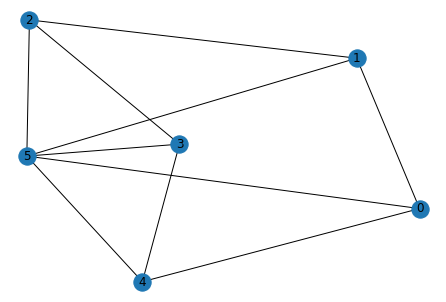

In [8]:
def MainMenu():
    A=eval(input("Enter Adjancey Matrix: "))
    print(A,type(A))
    printgraph(A)
    menu=[["Press","To Find "],[1,"Euler Path"],[2,"Hamiltonian Cycle"],[3,"Chromatic Number"],[4,"Exit"]]
    print(tabulate(menu,headers="firstrow",tablefmt="grid"))
    sub_menu=int(input())
    if(sub_menu==1):
        GetEulerPath(A)
    if(sub_menu==2):
        Hamiltonian(A)
    if(sub_menu==3):
        ChromaticNumber(A)
MainMenu()
A=[[0,0,1,1],[0,0,1,1],[1,1,0,0],[1,1,0,0]]
B=[[1,1,0,0,1,0],[1,0,1,0,1,0],[0,1,0,1,0,0],[0,0,1,0,1,1],[1,1,0,1,0,0],[0,0,0,1,0,0]]
euler_path_eg=[[0,1,1,1],[1,0,1,0],[1,1,0,0],[1,0,0,0]]
c=[[0,1,0,1],[1,0,1,1],[0,1,0,1],[1,1,1,0]]
d=[[0,1,0,0,0,1],[1,0,1,0,0,1],[0,1,0,1,0,1],[0,0,1,0,1,1],[1,0,0,1,0,1],[1,1,1,1,1,0]]